<a href="https://colab.research.google.com/github/NgugiMacharia/Machine-Learning/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 3


In [34]:
import numpy as np
import pandas as pd

In [35]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#import metrics
from statsmodels.tools.eval_measures import rmse

In [37]:
#import pylab
import scipy.stats as stats
import pylab

In [38]:
# import statsmodel
import statsmodels
import statsmodels.formula.api as smf

In [39]:
#using scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [40]:
# import warnings
import warnings

In [41]:
# notebook configuration
%matplotlib inline
sns.set(color_codes = True)
warnings.filterwarnings('ignore')

In [42]:
# read and display the dataset
data = pd.read_csv('/content/modified_data.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [43]:
# separate variable columns from the target column
x = data.drop('SalePrice', axis = 1)
y = data['SalePrice']

In [44]:
# variable columns
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,112,0,0,0,0,4,2010,WD,Normal


In [45]:
# Target column
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [46]:
# fill missing values using in the variable columns with their mean and display
x.fillna(x.mean().round(1), inplace = True)
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,112,0,0,0,0,4,2010,WD,Normal


In [47]:
# One hot encodding MSZoning
pd.get_dummies(x['MSZoning'], prefix = 'Zone')

,Zone_C (all),Zone_FV,Zone_RH,Zone_RL,Zone_RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


In [48]:
# Encodding variable columns...
pd.get_dummies(x['Street'], prefix = 'Street')

,Street_Grvl,Street_Pave
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1455,0,1
1456,0,1
1457,0,1
1458,0,1


In [49]:
# ..one by one...
pd.get_dummies(x['LotShape'], prefix = 'LotShape')

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1455,0,0,0,1
1456,0,0,0,1
1457,0,0,0,1
1458,0,0,0,1


In [50]:
# ..just out of curiosity...
pd.get_dummies(x['LandContour'], prefix = 'LContour')

,LContour_Bnk,LContour_HLS,LContour_Low,LContour_Lvl
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
1455,0,0,0,1
1456,0,0,0,1
1457,0,0,0,1
1458,0,0,0,1


In [51]:
# ...
pd.get_dummies(x['Utilities'], prefix = 'Utility')

,Utility_AllPub,Utility_NoSeWa
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1455,1,0
1456,1,0
1457,1,0
1458,1,0


In [52]:
pd.get_dummies(x['LotConfig'], prefix = 'LotConfig')

,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1455,0,0,0,0,1
1456,0,0,0,0,1
1457,0,0,0,0,1
1458,0,0,0,0,1


In [53]:
pd.get_dummies(x['LandSlope'], prefix = 'LSlope')

,LSlope_Gtl,LSlope_Mod,LSlope_Sev
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1455,1,0,0
1456,1,0,0
1457,1,0,0
1458,1,0,0


In [54]:
pd.get_dummies(x['Neighborhood'], prefix = 'Hood')

,Hood_Blmngtn,Hood_Blueste,Hood_BrDale,Hood_BrkSide,Hood_ClearCr,Hood_CollgCr,Hood_Crawfor,Hood_Edwards,Hood_Gilbert,Hood_IDOTRR,...,Hood_NoRidge,Hood_NridgHt,Hood_OldTown,Hood_SWISU,Hood_Sawyer,Hood_SawyerW,Hood_Somerst,Hood_StoneBr,Hood_Timber,Hood_Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
pd.get_dummies(x['Condition1'], prefix = 'Cond1')

,Cond1_Artery,Cond1_Feedr,Cond1_Norm,Cond1_PosA,Cond1_PosN,Cond1_RRAe,Cond1_RRAn,Cond1_RRNe,Cond1_RRNn
0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,0,0,0
1456,0,0,1,0,0,0,0,0,0
1457,0,0,1,0,0,0,0,0,0
1458,0,0,1,0,0,0,0,0,0


In [56]:
pd.get_dummies(x['Condition2'], prefix = 'Cond2')

,Cond2_Artery,Cond2_Feedr,Cond2_Norm,Cond2_PosA,Cond2_PosN,Cond2_RRAe,Cond2_RRAn,Cond2_RRNn
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1455,0,0,1,0,0,0,0,0
1456,0,0,1,0,0,0,0,0
1457,0,0,1,0,0,0,0,0
1458,0,0,1,0,0,0,0,0


In [57]:
pd.get_dummies(x['BldgType'], prefix = 'Type')

,Type_1Fam,Type_2fmCon,Type_Duplex,Type_Twnhs,Type_TwnhsE
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1455,1,0,0,0,0
1456,1,0,0,0,0
1457,1,0,0,0,0
1458,1,0,0,0,0


In [58]:
pd.get_dummies(x['HouseStyle'], prefix = 'Style')

,Style_1.5Fin,Style_1.5Unf,Style_1Story,Style_2.5Fin,Style_2.5Unf,Style_2Story,Style_SFoyer,Style_SLvl
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,0,0
1456,0,0,1,0,0,0,0,0
1457,0,0,0,0,0,1,0,0
1458,0,0,1,0,0,0,0,0


In [59]:
# encode the entire variable dataset
x_ohe = pd.get_dummies(x)
x_ohe


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [60]:
#standardize dataset with encoded variables
from sklearn import preprocessing
x_standard = preprocessing.scale(x_ohe)
y_standard = preprocessing.scale(y)
x_standard

array([[-1.73086488,  0.07337496, -0.22896913, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.7284922 , -0.87256276,  0.45233847, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.72611953,  0.07337496, -0.09270761, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 1.72611953,  0.30985939, -0.18354862, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.7284922 , -0.87256276, -0.09270761, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.73086488, -0.87256276,  0.22523594, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [61]:
# How many row and columns
x_standard.shape

(1460, 276)

In [62]:
# display stanardized target values
y_std = pd.DataFrame(y_standard, columns = ['Target'])
y_std

,Target
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843
...,...
1455,-0.074560
1456,0.366161
1457,1.077611
1458,-0.488523


In [63]:
y_standard.shape

(1460,)

In [64]:
# feature extraction with PCA
from sklearn import decomposition, datasets
pca = decomposition.PCA(n_components = 276)

x_standard_pca = pca.fit_transform(x_standard)
x_standard_pca

array([[ 4.25083167e+00,  1.58578532e+00, -2.39405652e+00, ...,
        -5.61759149e-17,  9.69154606e-17, -7.35653090e-17],
       [-1.35559588e-01, -3.26844037e+00, -6.53028016e-01, ...,
         4.26862428e-16,  1.47520247e-16, -4.02389763e-16],
       [ 4.86992273e+00,  9.16504286e-01, -1.71845012e+00, ...,
         7.90870813e-16,  3.37934463e-16, -4.94368426e-16],
       ...,
       [ 9.80408130e-01,  1.80851104e+00,  2.47090338e+00, ...,
        -5.51642365e-17, -2.46843586e-17,  2.75253214e-18],
       [-3.22116092e+00, -3.47038909e+00, -7.33674574e-01, ...,
         1.12199757e-16, -2.16190979e-17,  1.04353075e-17],
       [-1.36752904e+00, -3.81884290e+00, -1.34069460e+00, ...,
         4.36862294e-17,  1.00010932e-16, -1.14737653e-17]])

In [65]:
# Whats the shape of the dataset?
x_standard_pca.shape

(1460, 276)

In [66]:
# Feature selection using Lasso Regularization(L1)
from pandas.core.frame import DataFrame
from sklearn.linear_model import LassoCV, Lasso
reg = LassoCV()
reg.fit(x_standard_pca, y)
print("Best alpha using built-in LassoCV: %f" %reg.alpha_)
print("Best score usinng built-in LassoCV:%f" %reg.score(x_standard_pca, y))
x_pca = DataFrame(x_standard_pca)
coef = pd.Series(reg.coef_,index = x_pca.columns)

Best alpha using built-in LassoCV: 612.698185
Best score usinng built-in LassoCV:0.911707


In [67]:
# Output what L1 has done to the dataset
print("Lasso picked " +str(sum(coef != 0)) +" variables and eliminated the other " + str(sum(coef==0)) +" variables")

Lasso picked 161 variables and eliminated the other 115 variables


In [68]:
# lets train a model with PCA with 2 components
pca2 = decomposition.PCA(n_components = 2)
principalComponents = pca2.fit_transform(x_standard_pca)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y_std], axis = 1)
finalDf

,principal component 1,principal component 2,Target
0,4.250831,1.585852,0.347273
1,-0.135558,-3.268958,0.007288
2,4.869923,0.916334,0.536154
3,-1.909943,1.073973,-0.515281
4,6.515581,0.563842,0.869843
...,...,...,...
1455,1.996127,1.931058,-0.074560
1456,0.131257,-5.548170,0.366161
1457,0.980410,1.807679,1.077611
1458,-3.221159,-3.469435,-0.488523


Text(0, 0.5, 'pc2')

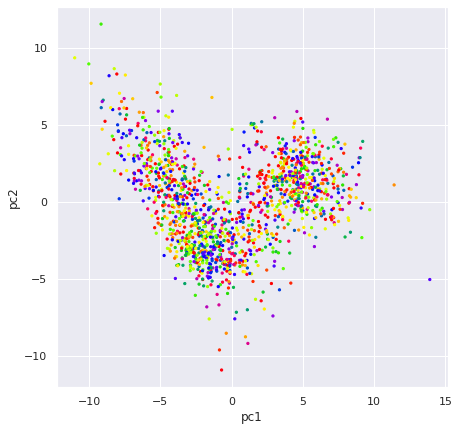

In [69]:
# graphical output
plt.figure(figsize = (7,7))
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], c = finalDf['Target'], cmap = 'prism', s = 5)
plt.xlabel('pc1')
plt.ylabel('pc2')